École GEOMDATA: Introduction à la science des données géométriques - 10-14 Sept. 2018

# TP: Méthodes variationnelles pour l'imagerie

## 1. Téléchargements
Tous les téléchargements se font à l'adresse suivante : https://www.i2m.univ-amu.fr/~caroline.chaux/enseignements.html


## 2. Gestion des images
Dans ce TP nous allons (entre autres) travailler avec l'image de Lena
<img src="lena.png" alt="Lena" width="128" height="128"/>

### Chargement d'une image

In [1]:
from scipy import ndimage as ndim
#on charge l'image de lena à l'aide de la fonction imread de la bibliothèque ndimage de scipy
y =ndim.imread("lena.png")

#on ne garde que la première composante car niveau de gris
y=y[:,:,0];
#l'image est de type int, on la cast en float pour pouvoir faire des calculs
y=y.astype(float)
#la taille de l'image peut s'obtenir à l'aide de l'attribut shape
[n1,n2]=y.shape


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


### Affichage d'une image

In [2]:
import matplotlib.pyplot as plt
#on affiche l'image à l'aide de la fonction imshow de la bibliothèque pyplot de matplotlib
#on donne un numero à la figure
plt.figure(1)
#on l'affiche en niveau de gris
plt.imshow(y, cmap="gray")
#on affiche la colorbar associée
plt.colorbar()
#on lui donne un titre
plt.title('Image originale')
#on affiche tout cela sur la figure 1
plt.show()

## 3. Problème direct
On s'intéresse premièrement au problème direct, c'est à dire, comment générer des observations $z$ à partir de données originales $y$. 
On rappelle que le problème d'observation s'écrit
\begin{equation}
z=\mathcal{D}_\alpha(Ly)
\end{equation}
où 
<ul>
<li> $z$ : observations</li>
<li> $y$ : données originales</li>
<li> $L$ : opérateur linéaire (un opérateur de convolution par exemple)</li>
<li> $\mathcal{D}_\alpha$ : perturbation de paramètre $\alpha$ (un bruit).</li>
</ul>

### 3.1. Le problème de convolution
On considère dans un premier temps que l'opérateur linéaire $L$ modélise une convolution.
\begin{equation}
z=\mathcal{D}_\alpha(h\star y)
\end{equation}
où $h$ est le noyau de convolution.

#### Rappels
On rappelle que le filtrage de l'image $g$ par le noyau $h$ est la suite $(w_{n_1,n_2})$ définie par 
\begin{equation}
w_{n_1,n_2}=\sum\limits_{m_1=0}^{N_1-1}\sum\limits_{m_2=0}^{N_2-1}h_{m_1,m_2}g_{n_1-m_1,n_2-m_2}=(h\star g)_{n_1,n_2} 
\end{equation}
où les indices $n_i-m_i$ sont définis modulo $N_i$ et où $g$ et $h$ sont de taille $N_1\times N_2$.

On note $\hat{h}=(\hat{h}_{k_1,k_2})$ et $\hat{g}=(\hat{g}_{k_1,k_2})$ les transformées de Fourier finies de $h=(h_{n_1,n_2})$ et $g=(g_{n_1,n_2})$.

Alors $w=(w_{n_1,n_2})$ est une suite finie et sa transformée de Fourier finie notée $\hat{w}=(\hat{w}_{k_1,k_2})$ vérifie

\begin{equation}
\hat{w}_{k_1,k_2}=\hat{h}_{k_1,k_2}\hat{g}_{k_1,k_2},\ \forall k_i=0,..,N_i-1.
\end{equation}

Avec Python, pour obtenir $\hat{w}$, il nous suffit donc de construire le vecteur dont chaque coordonnée est le produit des coordonnées correspondantes de $\hat{h}$ et $\hat{g}$.

### Noyaux de convolution
On considère ici deux types de noyau de convolution. Le noyau gaussien et le noyau uniforme. La construction de ces noyaux se fait grâce au deux fonctions fournies ci-après prenant chacune deux arguments : $n$ taille (en pixel) du noyau (i.e. le noyau obtenu sera de taille $n\times n$) et $s$ l'étalement du noyau.

In [3]:
#pour cela nous avons besoin de la bibliothèque numpy
import numpy as np

In [4]:
def gaussian(n,s):
    x = np.concatenate((np.arange(0,n/2,1),np.arange(-n/2,0,1)))
    [Y,X] = np.meshgrid(x,x)
    h = np.exp((-X**2-Y**2)/(2*s**2))
    h = h/np.sum(h)
    return h

In [5]:
def uniform(n,s):
    h=np.zeros((n,n))
    h[0:int(np.ceil(s/2)),0:int(np.ceil(s/2))] = 1
    h[n-int(np.floor(s/2)):n,0:int(np.ceil(s/2))]=1
    h[0:int(np.ceil(s/2)),n-int(np.floor(s/2)):n]=1
    h[n-int(np.floor(s/2)):n,n-int(np.floor(s/2)):n]=1
    h = h/np.sum(h)
    return h

### Exercice 1 : génération de noyaux
Construire un noyau gaussien de la taille de l'image de Lena chargée en section 3 et d'étalement $s=1$.<br />
Construire un noyau uniforme de la taille de l'image de Lena chargée en section 3 et d'étalement $s=5$.<br /> Visualiser les filtres ainsi que les modules leur réponses fréquentielles. (Pour voir le filtre on zoomera sur les indices de 0 à 20 par exemple).<br>

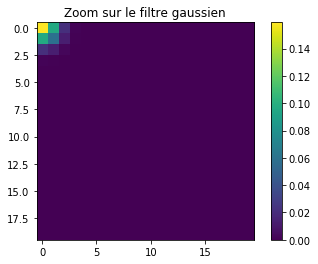

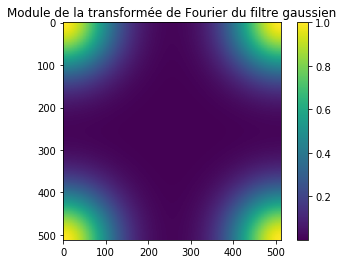

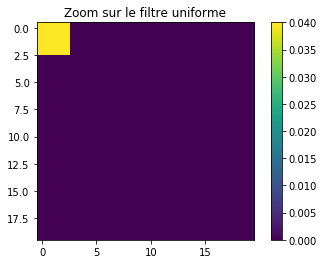

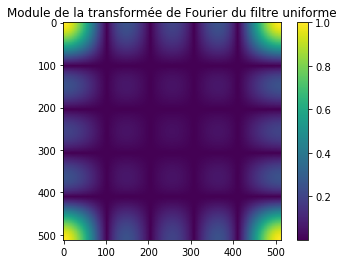

In [6]:
hg=gaussian(n1,1);
fhg=np.fft.fft2(hg);

plt.figure(2)
plt.imshow(hg[0:20,0:20])
plt.colorbar()
plt.title('Zoom sur le filtre gaussien')
plt.show()

plt.figure(3)
plt.imshow(np.abs(fhg))
plt.colorbar()
plt.title('Module de la transformée de Fourier du filtre gaussien')
plt.show()

hu=uniform(n1,5);
fhu=np.fft.fft2(hu);
plt.figure(4)
plt.imshow(hu[0:20,0:20])
plt.colorbar()
plt.title('Zoom sur le filtre uniforme')
plt.show()

plt.figure(5)
plt.imshow(np.abs(fhu))
plt.colorbar()
plt.title('Module de la transformée de Fourier du filtre uniforme')
plt.show()

### Exercice 2 : dégradation d'une image
Ecrire une fonction degrad_imag qui prend en entrée une image $y$, un noyau de convolution $h$, un paramètre $\alpha$ et un type de dégradation $\mathcal{D}$ et qui renvoie en sortie une image dégradée par un flou de noyau $h$ et une perturbation $\mathcal{D}_\alpha$ qui pourra être
<ol>
<li> un bruit additif gaussien de variance $\alpha=\sigma^2$; </li>
<li> un bruit Poissonien de paramètre d'échelle $\alpha>0$. </li>
</ol>

In [7]:
def degrad_imag(y,h,alpha,typ):
    if typ == "gaussien":
        #on floute
        z = np.real(np.fft.ifft2(np.fft.fft2(h)*np.fft.fft2(y)))
        #on bruite
        z = z+np.sqrt(alpha)*np.random.normal(size=np.shape(y))
    elif typ == "poisson":
        #on floute
        z = np.real(np.fft.ifft2(np.fft.fft2(h)*np.fft.fft2(y)))
        #on bruite
        z = np.random.poisson(alpha*z)
    return z

### Exercice 3 : génération d'images dégradées
Utiliser la fonction degrad_imag définie précédemment et générer 
<ul>
<li>une image $zb$ telle que $zb$ est la version dégradée de l'image de Lena où l'opérateur linéaire $L$ correspond au noyau gaussien défini dans l'exercice 1 et sans bruit.</li>
<li>une image $zg$ telle que $zg$ est la version dégradée de l'image de Lena où l'opérateur linéaire $L$ correspond au noyau gaussien défini dans l'exercice 1 et le bruit est un bruit additif gaussien de variance $100$.</li> 
</ul>
</br>
Afficher les images dégradées ainsi générées.

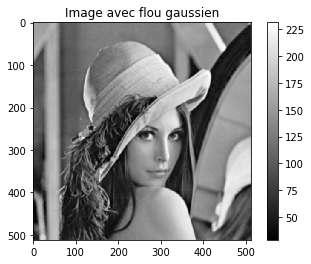

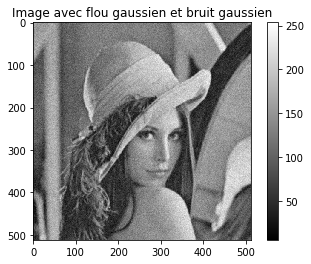

In [8]:
sigma2 = 100
zb=degrad_imag(y,hg,0,"gaussien");
plt.figure(6)
plt.imshow(zb, cmap="gray")
plt.colorbar()
plt.title('Image avec flou gaussien')
plt.show()

zg=degrad_imag(y,hg,sigma2,"gaussien");
plt.figure(7)
plt.imshow(zg, cmap="gray")
plt.colorbar()
plt.title('Image avec flou gaussien et bruit gaussien')
plt.show()

### 3.2 Mesures de qualité
Pour comparer les performances des algorithmes de restauration on utilisera le SNR (Signal to noise ratio). Si $\tilde{y}$ est le signal restauré et $y$ le signal original non bruité

\begin{equation}
SNR(y,\tilde{y})=10\log_{10}\left(\frac{\parallel y\parallel_2^2}{\parallel y-\tilde{y}\parallel_2^2}\right) \qquad \text{où} \quad \parallel y\parallel_2^2=\sum\limits_{n_1=0}^{N-1}\sum\limits_{n_2=0}^{N-1} |y_{n_1,n_2}|^2.
\end{equation}

On utilisera aussi le PSNR (Peak Signal to noise ratio). 

\begin{equation}
PSNR(y,\tilde{y})=10\log_{10}\left(\frac{255^2}{\parallel y-\tilde{y}\parallel_2^2}\right)
\end{equation}

### Exercice 4 : mesures de qualité

1 Fonction SNR :
Ecrire une fonction SNR qui prend en argument 2 images $y$ (l'image originale) et $\tilde{y}$ (l'image restaurée) et qui calcule le SNR entre ces deux images.

2 Fonction PSNR :
Ecrire une fonction PSNR qui prend en argument 2 images $y$ (l'image originale) et $\tilde{y}$ (l'image restaurée) et qui calcule le PSNR entre ces deux images.

In [9]:
def snr(x,xref):
    s = 10*np.log10(np.mean(xref**2)/np.mean((xref-x)**2))
    return s

def psnr(x,xref):
    s = 10*np.log10(255**2/np.mean((xref-x)**2))
    return s

Remarque : Dans le cas où le SNR (ou le PSNR) est calculé entre l'image originale et l'image bruitée ($\tilde{y}$ correspond donc à l'image dégradée $z$ ici), on parle de SNR (ou PSNR) initial.

### Exercice 5 : calculs du SNR et PSNR initiaux
Calculer le SNR et le PSNR initiaux entre l'image originale de Lena et ses versions dégradées $zb$ et $zg$ obtenues à l'exercice 2. Vérifier que l'on obtient environ $SNR(y,zb)=27.11$ dB et $PSNR(y,zb)=32.77$ dB pour $zb$ et  $SNR(y,zg)=21.18$ dB et $PSNR(y,zg)=26.84$ dB pour $zg$.

In [10]:
print('Sans bruit - SNR -PSNR')
print(snr(zb,y))
print(psnr(zb,y))
print()
print('Avec bruit - SNR -PSNR')
print(snr(zg,y))
print(psnr(zg,y))

Sans bruit - SNR -PSNR
27.11464264284575
32.771775149983185

Avec bruit - SNR -PSNR
21.206982142733164
26.864114649870597


## 4. Méthodes de base pour la déconvolution
On est donc dans le cas particulier où
\begin{equation}
z=\mathcal{D}_\alpha(h\star y)
\end{equation}
où
<ul>
<li> $z$ : observations</li>
<li> $y$ : données originales</li>
<li> $h$ : noyau de l'opérateur de convolution</li>
<li> $\mathcal{D}_\alpha$ : perturbation de paramètre $\alpha$ (un bruit)</li>
</ul>

### 4.1. Méthode d'inversion

On se propose ici d'implémenter la méthode d'inversion. Cette méthode est très simple et consiste à appliquer le filtre inverse aux observations. Cela équivaut, dans le domaine de Fourier, à diviser terme à terme l'observation par la réponse fréquentielle du filtre de dégradation.

### Exercice 6 : inversion directe

1. Fonction inversion
Créez une fonction inversion_flou qui prend en entrée l'image observée $z$, la réponse impulsionnelle d'un filtre $h$ et donne en sortie l'image estimée en faisant l'inversion directe en Fourier comme expliqué ci-dessus.

2. Application
Appliquer cette fonction aux observations $zg$ et $zb$ de l'exercice 3. Afficher les images et calculer les performances numériques c'est-à-dire le SNR et le PSNR.

In [11]:
def inversion_flou(z,h):
    g=np.real(np.fft.ifft2( np.fft.fft2(z) /np.fft.fft2(h)))
    return g

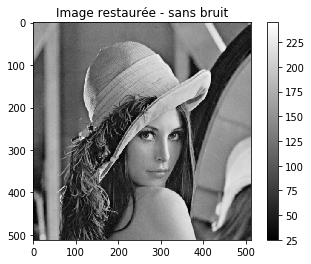

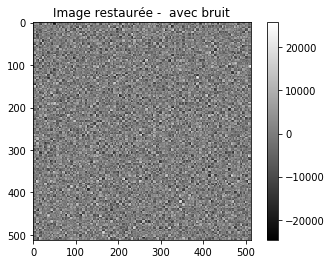

Sans bruit - SNR -PSNR
256.8954476902383
262.55258019737573

Avec bruit - SNR -PSNR
-32.07828250243391
-26.421149995296474


In [12]:
gb = inversion_flou(zb,hg)
gg = inversion_flou(zg,hg)

plt.figure(8)
plt.imshow(gb, cmap="gray")
plt.colorbar()
plt.title('Image restaurée - sans bruit')
plt.show()

plt.figure(9)
plt.imshow(gg, cmap="gray")
plt.colorbar()
plt.title('Image restaurée -  avec bruit')
plt.show()

print('Sans bruit - SNR -PSNR')
print(snr(gb,y))
print(psnr(gb,y))
print()
print('Avec bruit - SNR -PSNR')
print(snr(gg,y))
print(psnr(gg,y))

### 4.2. Filtre de Wiener dans le cas d'un bruit additif Gaussien
On suppose donc à présent que $\mathcal{D}_\alpha$ modélise un bruit additif gaussien de variance $\alpha=\sigma^2$. 
On se restreint donc au cas où 
\begin{equation}
z=(h\star y) + b
\end{equation}
avec
<ul>
<li> $z$ : observations </li>
<li> $y$ : données originales </li>
<li> $h$ : noyau de l'opérateur de convolution</li>
<li> $b$ : bruit additif Gaussien de variance $\sigma^2$</li>
</ul>

#### Filtre de Wiener pour la déconvolution
<em>
La formule qui donne le filtre de restauration de Wiener dans le cas de la déconvolution est
$$\hat{g}(\omega)=\frac{\overline{\hat{h}(\omega)}\mathcal{S}_x(\omega)}{|\hat{h}(\omega)|^2\mathcal{S}_x(\omega)+\sigma^2} $$
où $\hat{h}$ est la fonction de transfert du filtre de dégradation et $\mathcal{S}_x$ est la densité spectrale du processus aléatoire $x$ dont l'image de départ $y$ est une réalisation.


Remarque: ici on considère que l'image de départ $y$ est une réalisation d'un processus aléatoire $x$ sous jacent. Pour obtenir $\mathcal{S}_x$ on utilise la méthode du périodogramme sur une seule réalisation.

### Exercice 7 : Filtre de Wiener en déconvolution

1. Fonction filtre de Wiener:
Créez une fonction filtredeconvwiener qui prend en entrée la réponse impulsionnelle d'un filtre $h$, une variance $\sigma^2$ et une densité spectrale $\mathcal{S}_x$, et ressort la fonction de transfert du filtre de Wiener pour la restauration.<br />
Nous avons une seule réalisation, donc on estime directement $\mathcal{S}_x=\frac{|\hat{y}|^2}{N_1N_2}$ avec $\hat{y}$ la transformée de Fourier finie de $y$ et $N_1 \times N_2$ sa taille.<br />

2. Filtre de Wiener application du filtre inverse à l'image floue: 
Appliquer ce filtre aux observations floues $zb$ afin d'obtenir l'image restaurée avec le filtre de Wiener. Afficher l'image et calculer les performances numériques c'est-à-dire le SNR et le PSNR. Comment cela se compare-t-il au filtre inverse ?

3. Filtre de Wiener application du filtre inverse à l'image floue et bruitée:
Appliquer ce filtre aux observations floues et bruitées $zg$ afin d'obtenir l'image restaurée avec le filtre de Wiener. Afficher l'image et calculer les performances numériques c'est-à-dire le SNR et le PSNR. Comment cela se compare-t-il au filtre inverse ?

In [13]:
def filtredeconvwiener(h,sigma,Sx):
    g=(np.conj(np.fft.fft2(h))*Sx)/(np.abs(np.fft.fft2(h))**2*Sx+sigma)
    return g

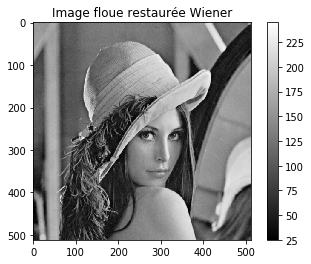

256.8954295533125
262.55256206045


In [14]:
Sx=np.abs(np.fft.fft2(y))**2/(n1*n2)
g1=filtredeconvwiener(hg,0,Sx)
yw1=np.real(np.fft.ifft2(g1*np.fft.fft2(zb)))

plt.figure(10)
plt.imshow(yw1, cmap="gray")
plt.colorbar()
plt.title('Image floue restaurée Wiener')
plt.show()
print(snr(yw1,y))
print(psnr(yw1,y))

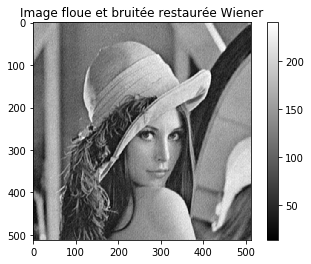

25.660128054566197
31.31726056170363


In [15]:
g2=filtredeconvwiener(hg,sigma2,Sx)
yw2=np.real(np.fft.ifft2(g2*np.fft.fft2(zg)))


plt.figure(11)
plt.imshow(yw2, cmap="gray")
plt.colorbar()
plt.title('Image floue et bruitée restaurée Wiener')
plt.show()
print(snr(yw2,y))
print(psnr(yw2,y))

### 4.3. Première méthode régularisée pour la déconvolution : approche régularisée type Tikhonov
On reste dans de le cas de la déconvolution, on considère une régularisation de Tikhonov qui aboutit au problème suivant:
$$
\underset{y \in \mathbb{R}^{N_1 \times N_2}}{\text{min}} \tfrac{1}{2} \|z-(h\star y)\|^2_2 + \lambda \|y\|_2^2
$$
dont la solution analytique $\widetilde{y}$ est donnée en Fourier par
$$
\widehat{\widetilde{y}}(\omega)=\frac{\overline{\widehat{h}}(\omega)\widehat{z}(\omega)}{|\widehat{h}(\omega)|^2 + 2 \lambda},\quad \forall\omega.
$$
On appelle $\lambda$ le paramètre de régularisation.

### Exercice 8 : Déconvolution par Tikhonov
<ol> 
<li>Ecrire une fonction  restore\_tikhonov qui prend en entrée les observations $z$, le noyau de convolution $h$ et le paramètre de régularisation $\lambda$, et qui retourne en sortie l'image restaurée $\widetilde{y}$ avec la méthode de Tikhonov.</li>
<li>Générer une image dégradée de l'image de Lena  avec un flou gaussien d'étalement s=3 et un bruit blanc centré gaussien de variance σ2=100.</li> 
<li>Faire varier le paramètre de régularisation $\lambda$ (tester en priorité $\lambda=[0.0001,0.001,0.01,0.05,0.1,1]$).
Afficher à chaque fois l'image obtenue et calculer le SNR et le PSNR. Qu'observez-vous ?<br/>
</ol>

The initial SNR is 18.13
The initial PSNR is 23.85


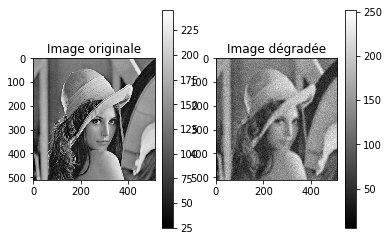

lambda = 0.0001
SNR = 6.83
PSNR = 11.51


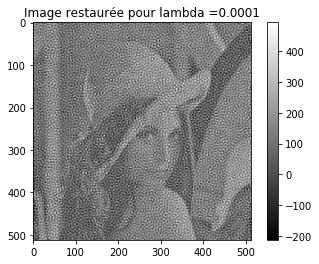

lambda = 0.001
SNR = 15.36
PSNR = 20.94


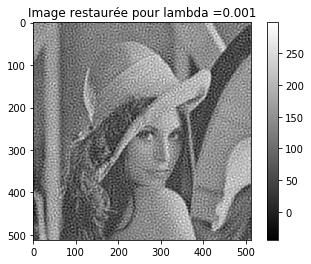

lambda = 0.01
SNR = 20.57
PSNR = 26.42


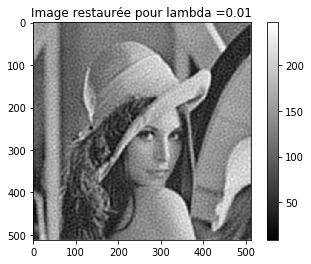

lambda = 0.05
SNR = 17.0
PSNR = 23.53


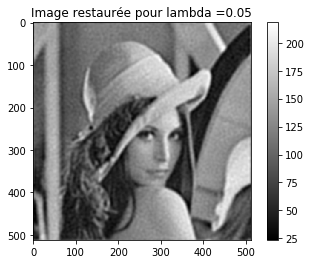

lambda = 0.1
SNR = 12.67
PSNR = 19.98


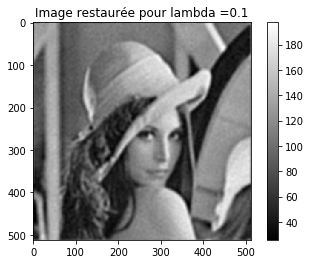

lambda = 1
SNR = -6.22
PSNR = 9.09


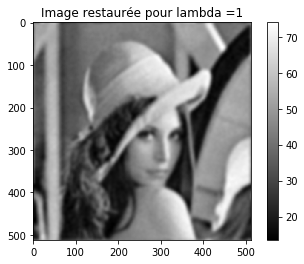

In [16]:
h3=gaussian(n1,3)
sigma2=100
z3=degrad_imag(y,h3,sigma2,"gaussien")

def restore_tikhonov(z,h,l):
    hfft = np.fft.fft2(h)
    yestFourier =  np.conj(hfft)*np.fft.fft2(z)/(np.abs(hfft)**2+2*l)
    yest = np.real(np.fft.ifft2(yestFourier))
    return yest

print('The initial SNR is ' + str(round(snr(y,z3),2)))
print('The initial PSNR is ' + str(round(psnr(y,z3),2)))

plt.figure(2)
plt.plot(121)
plt.subplot(121)
plt.imshow(y, cmap="gray")
plt.colorbar()
plt.title('Image originale')

plt.subplot(122)
plt.imshow(z3, cmap="gray")
plt.colorbar()
plt.title('Image dégradée')
plt.show()

il=[0.0001,0.001,0.01,0.05,0.1,1]
for l in il:
    yest=restore_tikhonov(z3,h3,l)
    print('lambda = ' + repr(l))
    print('SNR = ' + str(round(snr(y,yest),2)))
    print('PSNR = ' + str(round(psnr(y,yest),2)))
    plt.figure()
    plt.imshow(yest, cmap="gray")
    plt.colorbar()
    plt.title('Image restaurée pour lambda ='+ repr(l))
    plt.show()

## 5. Décomposition en ondelettes d'une image
Afin de manipuler des ondelettes en Python, nous utiliserons la boîte à outils PyWavelets. Pour plus d'informations, on pourra se référer à la documentation de cette boîte à outils disponible à l'adresse suivante
<a href = "http://pywavelets.readthedocs.io/en/latest/contents.html">http://pywavelets.readthedocs.io/en/latest/contents.html</a>

In [17]:
# on charge la librairie ondelettes
import pywt

### 5.1 Calcul et visualisation de la transformée en ondelettes

Pour calculer la décomposition multirésolution de l'image test Lena sur $j_m=3$ niveaux de décomposition, on utilise la commande wavedec2. Outre l'image à transformer, on doit lui donner
<ol>
<li>l'ondelettes choisie, ici Daubechies de longueur 4</li>
<li>le mode d'extension, ici periodique.</li>
</ol>

Les coefficients calculés se divisent comme suit:
<ol>
<li>la sous-bande d'approximation</li>
<li>3 sous-bandes (horizontale, verticale et diagonale) par niveaux de décomposition</li>
</ol>

Pour visualiser tous les coefficients d'un coup on utlise la commande coeffs_to_array qui range les coefficients de décomposition dans un tableau. Pour visualiser une sous-bande, on pourra écrire une ligne ressemblant à 

cA3, (cH3, cV3, cD3),(cH2, cV2, cD2),(cH1, cV1, cD1) = coeffs

et observer chaque sous-bande de coefficients indépendamment.

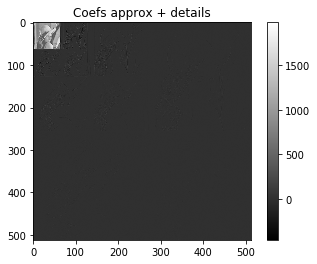

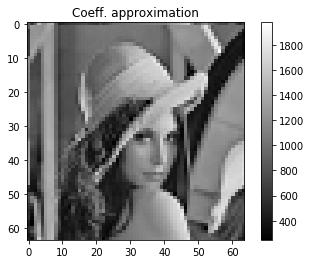

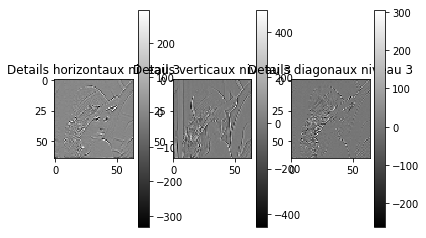

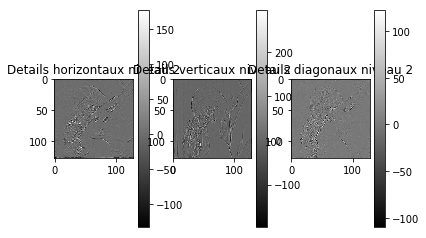

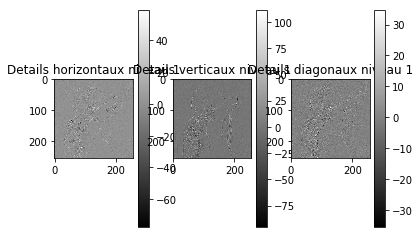

In [18]:
# Définition de l'ondelette
wavelet = pywt.Wavelet('db2')
# Calcul des coefficients
coeffs = pywt.wavedec2(y, wavelet, mode='periodization', level=3)
# Regroupement des coefficients en un tableau
ca, sli = pywt.coeffs_to_array(coeffs)
# Séparation des sous-bandes
cA3, (cH3, cV3, cD3),(cH2, cV2, cD2),(cH1, cV1, cD1) = coeffs

#Visualisation du tableau
plt.figure(10)
plt.imshow(ca, cmap="gray")
plt.colorbar()
plt.title('Coefs approx + details')
plt.show()


plt.figure(11)
plt.imshow(cA3, cmap="gray")
plt.colorbar()
plt.title('Coeff. approximation')
plt.show()

plt.figure(12)
plt.plot(131)
plt.subplot(131)
plt.imshow(cH3, cmap="gray")
plt.colorbar()
plt.title('Details horizontaux niveau 3')

plt.subplot(132)
plt.imshow(cV3, cmap="gray")
plt.colorbar()
plt.title('Details verticaux niveau 3')

plt.subplot(133)
plt.imshow(cD3, cmap="gray")
plt.colorbar()
plt.title('Details diagonaux niveau 3')
plt.show()

plt.figure(13)
plt.plot(131)
plt.subplot(131)
plt.imshow(cH2, cmap="gray")
plt.colorbar()
plt.title('Details horizontaux niveau 2')

plt.subplot(132)
plt.imshow(cV2, cmap="gray")
plt.colorbar()
plt.title('Details verticaux niveau 2')

plt.subplot(133)
plt.imshow(cD2, cmap="gray")
plt.colorbar()
plt.title('Details diagonaux niveau 2')
plt.show()

plt.figure(14)
plt.plot(131)
plt.subplot(131)
plt.imshow(cH1, cmap="gray")
plt.colorbar()
plt.title('Details horizontaux niveau 1')

plt.subplot(132)
plt.imshow(cV1, cmap="gray")
plt.colorbar()
plt.title('Details verticaux niveau 1')

plt.subplot(133)
plt.imshow(cD1, cmap="gray")
plt.colorbar()
plt.title('Details diagonaux niveau 1')
plt.show()

### Exercice 9 : transformée en ondelettes inverse
Reconstruire l'image de Lena à l'aide de la commande waverec2 à partir des coefficients de décomposition obtenus à l'exercice précédent. <br />
Vérifier que l'on a bien reconstruction parfaite (en calculant par exemple l'erreur de reconstruction).

In [19]:
# on vérifie la reconstrution
yrec = pywt.waverec2(coeffs, 'db2',mode='periodization')
print(np.sum(y-yrec)**2)

3.551865249920128e-16


### 5.2 Histogramme des coeffcicients et parcimonie

Les commandes suivantes permettent de visualiser l'histogramme de niveaux de gris des pixels de l'image Lena. La courbe superposée en rouge est la Gaussienne de même moyenne et variance. La mauvaise adéquation montre que les valeurs de niveaux de gris ont une distribution loin de la Gaussienne.

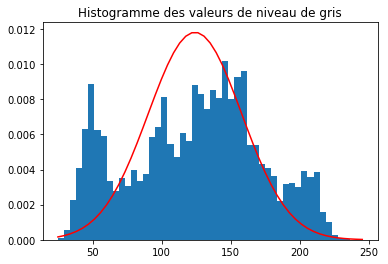

In [20]:
plt.figure(14)
n, bins, patches = plt.hist(y.flatten(),50, normed=True)
ym = np.mean(y.flatten())
yv=np.var(y.flatten())
cg = np.exp(-(bins-ym)**2/yv)
cg =cg/np.sum(cg)/(bins[2]-bins[1])
plt.plot(bins,cg,'r')
plt.title('Histogramme des valeurs de niveau de gris')
plt.show()

### Exercice 10 : histogramme des coefficients en ondelettes

Afficher de la même manière l'histogramme de la sous bande d'approximation, puis de celle horizontale de niveau 3, puis de celle horizontale de niveau 2 et enfin de celle horizontale de niveau 1. Observez le comportement autour de zéro. Qu'en déduisez-vous ?

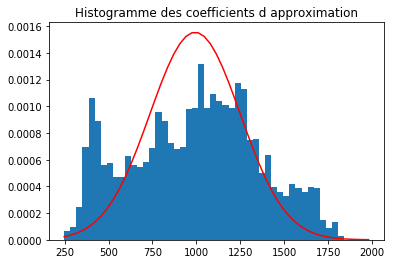

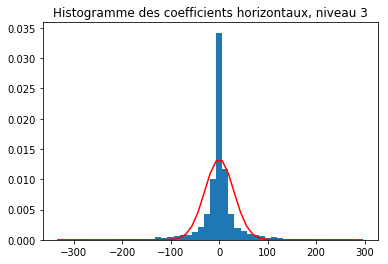

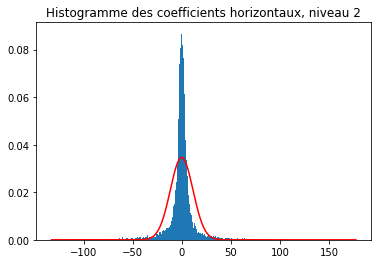

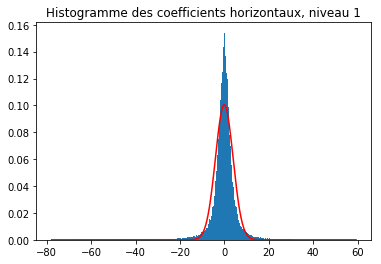

In [21]:
plt.figure(15)

yy=cA3
n, bins, patches = plt.hist(yy.flatten(),50, normed=True)
ym = np.mean(yy.flatten())
yv=np.var(yy.flatten())
cg = np.exp(-(bins-ym)**2/yv)
cg =cg/np.sum(cg)/(bins[2]-bins[1])
plt.plot(bins,cg,'r')
plt.title('Histogramme des coefficients d approximation')
plt.show()

plt.figure(15)

yy=cH3
n, bins, patches = plt.hist(yy.flatten(),50, normed=True)
ym = np.mean(yy.flatten())
yv=np.var(yy.flatten())
cg = np.exp(-(bins-ym)**2/yv)
cg =cg/np.sum(cg)/(bins[2]-bins[1])
plt.plot(bins,cg,'r')
plt.title('Histogramme des coefficients horizontaux, niveau 3')
plt.show()

plt.figure(16)

yy=cH2
n, bins, patches = plt.hist(yy.flatten(),500, normed=True)
ym = np.mean(yy.flatten())
yv=np.var(yy.flatten())
cg = np.exp(-(bins-ym)**2/yv)
cg =cg/np.sum(cg)/(bins[2]-bins[1])
plt.plot(bins,cg,'r')
plt.title('Histogramme des coefficients horizontaux, niveau 2')
plt.show()

plt.figure(17)

yy=cH1
n, bins, patches = plt.hist(yy.flatten(),500, normed=True)
ym = np.mean(yy.flatten())
yv=np.var(yy.flatten())
cg = np.exp(-(bins-ym)**2/yv)
cg =cg/np.sum(cg)/(bins[2]-bins[1])
plt.plot(bins,cg,'r')
plt.title('Histogramme des coefficients horizontaux, niveau 1')
plt.show()

## 6. Résolution d'un problème inverse avec un a-priori de parcimonie

### 6.1. Utiliser la parcimonie pour débruiter
On cherche ici à restaurer une image bruitée:
$$   z=y + b $$
où $b$ est un bruit additif blanc gaussien centré de variance (connue) $\sigma^2$.

On estime $y$ avec un a-priori de parcimonie en ondelettes à la synthèse c'est-à-dire qu'on cherche la décomposition en ondelettes
$\widetilde{x}$ minimisant
$$
\underset{x \in \mathbb{R}^{N_1 \times N_2}}{\text{min}} \tfrac{1}{2} \|z-F^{-1}(x)\|^2_2 + \lambda \|x\|_1
$$
où $F$ est l'opérateur d'analyse multirésolution en ondelettes implémenté à l'exercice précédent (wavedec2) et $F^{-1}$ l'opérateur de synthèse (waverec2).
La solution analytique $\widetilde{x}$ est donnée par
$$
\widetilde{x}_n=\text{Soft}_{\lambda}(F(z)_n)
$$
où $\text{Soft}_{\lambda}$ est le seuillage doux défini par
$$
\text{Soft}_{\lambda}(x)=\begin{cases}x-\lambda & \text{si } x\geq\lambda \\
x+\lambda & \text{si } x\leq -\lambda \\
0 & \text{sinon.} \end{cases}
$$
Le signal estimé vaut quand à lui $\widetilde{y}=F^{-1}(\widetilde{x})$.

### Exercice 11 : Débruitage par seuillage doux
<ol>
<li>Générer une observation $z$ de l'image test Lena avec un bruit de variance $\sigma^2=100$. </li>
<li>Ecrire une fonction matlab debruite_AMR qui prend en entrée les observations $z$ et le paramètre de régularisation $\lambda$, et qui retourne en sortie l'image restaurée $\widetilde{y}$ avec la méthode décrite ci-dessus. Pour le seuillage doux, on pourra coder soit-même la fonction ou utiliser la fonction threshold de PyWavelets. Pour la gestion des coefficients d'ondelettes, on pourra s'appuyer sur les fonctions coeffs_to_array et pywt.array_to_coeffs de PyWavelets.</li>
<li> Faire varier le paramètre de régularisation $\lambda$ (par exemple $\lambda=[0.1, 1,10,100]$.
Qu'observez-vous lorsque $\lambda$ augmente sur
<ul>
<li>le nombre de coefficients à zéro dans la décomposition de $\tilde{y}$ (on pourra utiliser la fonction np.count_nonzero)</li>
<li>le SNR (ou autre mesure) entre $\tilde{y}$ et l'image réelle? </li>
</ul>
</ol>

The initial SNR is 22.53
The initial PSNR is 28.16


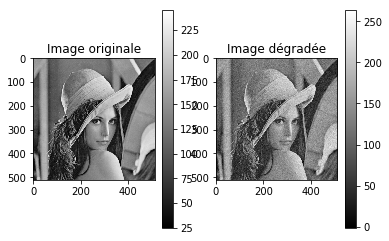

lambda = 0.1
SNR = 22.58
PSNR = 28.22
number of zero coefs = 1837


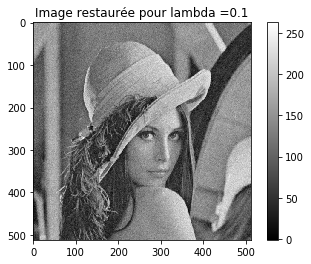

lambda = 1
SNR = 23.1
PSNR = 28.74
number of zero coefs = 18048


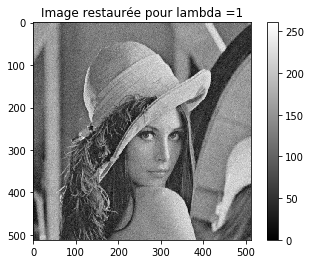

lambda = 10
SNR = 26.49
PSNR = 32.23
number of zero coefs = 156639


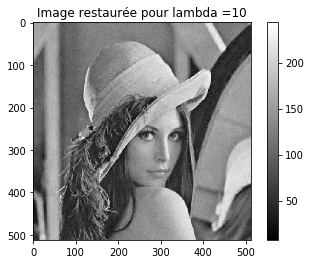

lambda = 100
SNR = 16.65
PSNR = 23.16
number of zero coefs = 256839


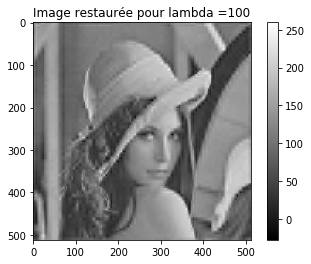

In [22]:
alpha = 100;
z = y+np.sqrt(alpha)*np.random.normal(size=np.shape(y))

def debruite_AMR(z, l):
    coeffs = pywt.wavedec2(z, 'db2',mode='periodization',level=3)
    coef_arr, coeff_slices = pywt.coeffs_to_array(coeffs)
    coef_arr = pywt.threshold(coef_arr, l, 'soft')
    nb  = np.count_nonzero(coef_arr==0)
    coeffs = pywt.array_to_coeffs(coef_arr, coeff_slices, output_format='wavedec2')
    y = pywt.waverec2(coeffs, 'db2',mode='periodization')
    return y, nb

print('The initial SNR is ' + str(round(snr(y,z),2)))
print('The initial PSNR is ' + str(round(psnr(y,z),2)))

plt.figure(2)
plt.plot(121)
plt.subplot(121)
plt.imshow(y, cmap="gray")
plt.colorbar()
plt.title('Image originale')

plt.subplot(122)
plt.imshow(z, cmap="gray")
plt.colorbar()
plt.title('Image dégradée')
plt.show()

il=[0.1,1,10,100]
for l in il:
    yest, nbest=debruite_AMR(z,l)
    print('lambda = ' + repr(l))
    print('SNR = ' + str(round(snr(y,yest),2)))
    print('PSNR = ' + str(round(psnr(y,yest),2)))
    print('number of zero coefs = ' + str(nbest))
    plt.figure()
    plt.imshow(yest, cmap="gray")
    plt.colorbar()
    plt.title('Image restaurée pour lambda ='+ repr(l))
    plt.show()

### 6.2. Déconvolution par seuillage doux : l'algorithme iSTA
On souhaite maintenant procéder à la déconvolution selon le modèle
$$
  z=(h\star y) + b = K_{h}(y) + b
$$

On cherche comme précédemment une solution à la synthèse i.e. 
$\widetilde{y}=F^{-1}\widetilde{x}$ où $\widetilde{x}$ minimise

$$
\underset{x \in \mathbb{R}^{N_1 \times N_2}}{\text{min}} \tfrac{1}{2} \|y-K_h(F^{-1}x)\|^2_2 + \lambda \|x\|_1
$$

Ceci est un cas particulier du problème suivant qui consiste à minimiser
$$
\underset{x \in \mathbb{R}^{N_1 \times N_2}}{\text{min}} \{G(x)=\tfrac{1}{2} \|z-Ax\|^2_2 + \lambda \|x\|_1\}
$$
où $A$ est un opérateur linéaire borné, $\lambda>0$ est appelé paramètre de régularisation.

L'algorithme de seuillage itératif appelé ISTA (<em>Iterative Soft Thresholding Algorithm</em>), est un (parmi les nombreux) algorithmes qui permet de minimiser l'équation précédente.
Il  est donné par
$$\left\{
  \begin{array}{rl}
   \text{Initialisation:}& x^0  \in\mathbb{R}^{N_1 \times N_2} \\
   \text{Boucle: pour}\ k\geq 0:& x^{k+1}  =\text{Soft}_{\lambda}\left(x^k+A^*(z-Ax^k)\right)  
  \end{array}
\right.
$$
où $A^*$ est l'opérateur adjoint de $A$ et où $\text{Soft}_{\lambda}$ agit ici sur chaque coordonnée de $x$ dans $\mathbb{R}^{N_1 \times N_2}$ indépendamment.

On note que dans le cas où $A = K_h \circ F^{-1}$, on a  $A^* = F \circ K_{h^1}$ où $\widehat{h^1}=\bar{\widehat{h}}$.

### Exercice 12 : Déconvolution par seuillage itératif (algorithme ISTA)
<ol>
<li>Ecrire une fonction ista qui prend en entrée l'image dégradée $z$, le filtre de dégradation $h$ et le paramètre de régularisation $\lambda$ et le nombre d'itération $K$ et qui donne en retour l'image restaurée par ISTA en effectuant $K$ itérations.
Les opérations clés sont :
    <ol>
		<li>Application de la transformée en ondelettes $F$ (wavedec2);</li>
		<li>Application de l'opérateur $K_h$ : produit terme à terme en Fourier (réponse fréquentielle $\widehat{h}$);</li>
		<li>Application l'adjoint de l'opérateur $K_{h^{1}}$ : produit terme à terme en Fourier avec le complexe conjugué (conj) de la réponse fréquentielle ${\widehat{h}}$.</li>
		<li>Application de la transformée en ondelettes inverse $F^{-1}$ (waverec2).</li>
		<li>Le seuillage doux (threshold)</li>
	</ol></li>

<li>Appliquer l'algorithme ISTA pour restaurer l'image générée à l'exercice 8 (restauration de Tikhonov) avec différentes valeurs de $\lambda$. On testera en priorité $\lambda=[0.1,1,10]$.<br />
Note: il faut veiller à faire suffisamment d'itérations ($N$ grand) pour arriver à convergence. Pour le vérifier, on peut ajouter une figure dans ISTA traçant $||x^{k+1} - x^{k}||$ en fonction de $k$.</li>
<li>Comparer qualitativement (sur des portions d'images par exemple) et quantitativement (SNR, PSNR) le meilleur résultat obtenu avec l'algorithme de Tikhonov à l'exercice 1 et le meilleur résultat obtenu ici.
</li>
</ol>

The initial SNR is 18.13
The initial PSNR is 23.85


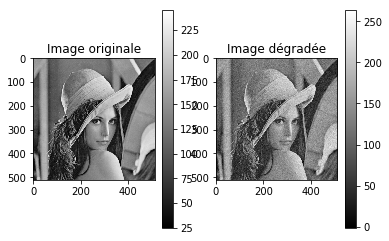

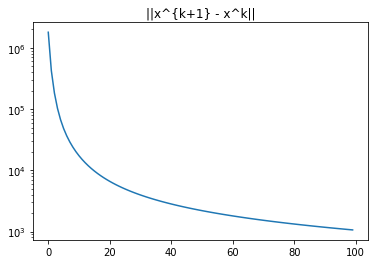

lambda = 0.01
SNR = 17.59
PSNR = 23.21


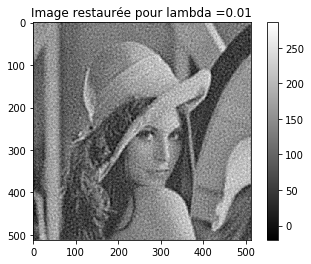

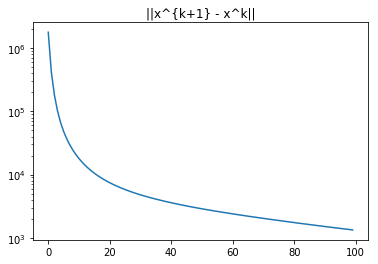

lambda = 0.1
SNR = 19.03
PSNR = 24.68


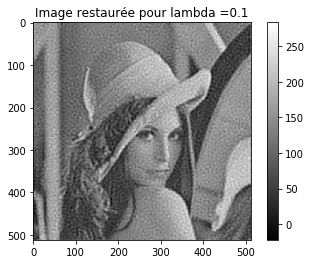

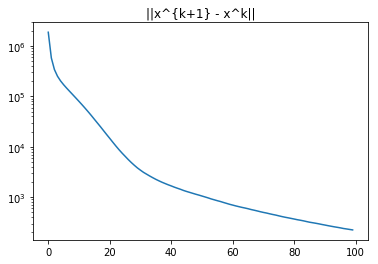

lambda = 1
SNR = 20.45
PSNR = 26.12


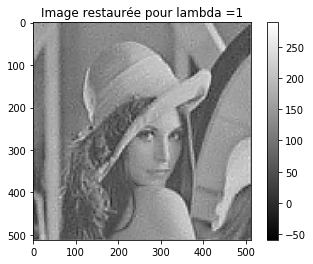

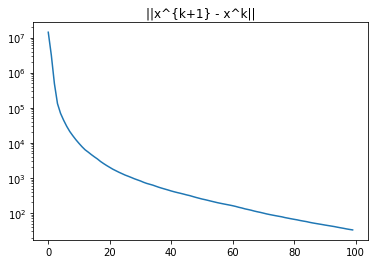

lambda = 10
SNR = 19.72
PSNR = 25.44


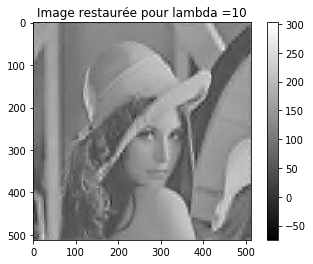

In [23]:
def ista(z,h,l,N):
    resNorm = np.zeros((N,1))
    hfft = np.fft.fft2(h)
    hfftConj = np.conj(hfft)
    #initialisation
    coeffs = pywt.wavedec2(z, 'db2',mode='periodization',level=5)
    x, coeff_slices = pywt.coeffs_to_array(coeffs)
    #Boucle
    for i in np.arange(0,N,1):
        # Transformee ondelette inverse
        y = pywt.waverec2(coeffs, 'db2',mode='periodization')
        # Application Kh et calcul du residu
        y = z - np.real(np.fft.ifft2(hfft*np.fft.fft2(y)))
        # Application de Kh1
        y = np.real(np.fft.ifft2(hfftConj*np.fft.fft2(y)))
        # Mise à jour des coefficients
        coeffs = pywt.wavedec2(y, 'db2',mode='periodization',level=5)
        xtmp, coeff_slices = pywt.coeffs_to_array(coeffs)
        xplus =  pywt.threshold(x + xtmp,l,'soft')
        coeffs = pywt.array_to_coeffs(xplus, coeff_slices,output_format='wavedec2')
        # Calcul de la norme residuelle
        resNorm[i] = np.sum((x-xplus)**2)
        x=xplus  
        
    y = pywt.waverec2(coeffs, 'db2',mode='periodization')
    plt.figure(20)
    plt.semilogy(resNorm)
    plt.title('||x^{k+1} - x^k||')    
    plt.show() 
    return y

print('The initial SNR is ' + str(round(snr(y,z3),2)))
print('The initial PSNR is ' + str(round(psnr(y,z3),2)))

plt.figure(2)
plt.plot(121)
plt.subplot(121)
plt.imshow(y, cmap="gray")
plt.colorbar()
plt.title('Image originale')

plt.subplot(122)
plt.imshow(z, cmap="gray")
plt.colorbar()
plt.title('Image dégradée')
plt.show()

N=100
il=[0.01,0.1,1,10]
for l in il:
    yest = ista(z3,h3,l,N)
    print('lambda = ' + repr(l))
    print('SNR = ' + str(round(snr(y,yest),2)))
    print('PSNR = ' + str(round(psnr(y,yest),2)))
    plt.figure()
    plt.imshow(yest, cmap="gray")
    plt.colorbar()
    plt.title('Image restaurée pour lambda ='+ repr(l))
    plt.show()


### 6.3. Déconvolution par seuillage doux : l'algorithme FiSTA

L'algorithme FISTA est une version accélérée de l'agorithme ISTA (<em>Iterative Soft Thresholding Algorithm</em>), il résout le même problème de minimisation et est donné par

$$\left\{
  \begin{array}{rl}
    \text{Initialisation: }& \\
    y^1 =& x^0  \in\mathbb{R}^{N_1 \times N_2} \\
    t^0 =& 1\\
   \text{Boucle: }\forall\ k\geq 0: &\\
   x^{k+1}  =& \text{Soft}_{\lambda}\left(y^k+A^*(z-Ay^k)\right)  \\
   t^{k+1}  =& \frac{1+\sqrt{{t^k}^2+1}}{2}\\
   y^{k+1}  =&  x^k + \left(\frac{t^k - 1}{t^{k+1}}\right) (x^{k+1}-x^k)
  \end{array}
\right.$$

### Exercice 13 : Déconvolution par seuillage itératif accéléré (algorithme FISTA)
<ol>
<li>Ecrire une fonction fista qui prend en entrée l'image dégradée $z$, le filtre de dégradation $h$ et le paramètre de régularisation $\lambda$ et le nombre d'itération $K$ et qui donne en retour l'image restaurée par ISTA en effectuant $K$ itérations.
</li>
<li>Appliquer l'algorithme FISTA pour restaurer l'image générée à l'exercice 8 (restauration de Tikhonov) avec  $\lambda=1$ et comparer la vitesse de calcul avec l'exercice précédent.
</li>
</ol>

The initial SNR is 18.13
The initial PSNR is 23.85


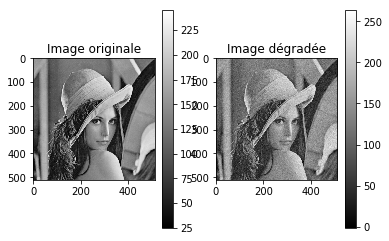

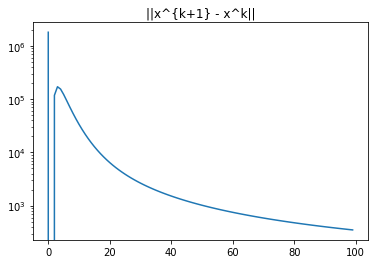

lambda = 0.01
SNR = 18.84
PSNR = 24.49


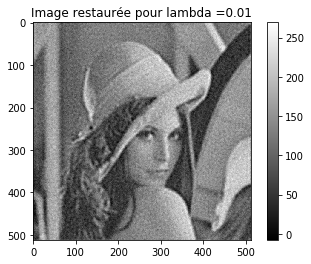

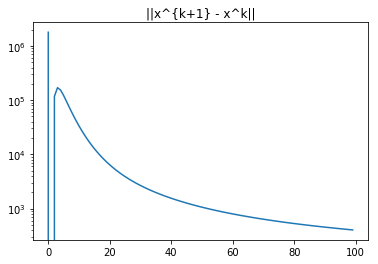

lambda = 0.1
SNR = 19.4
PSNR = 25.06


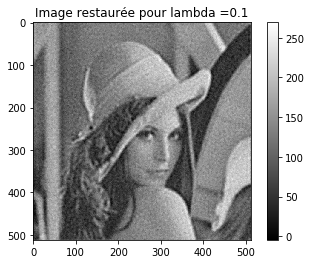

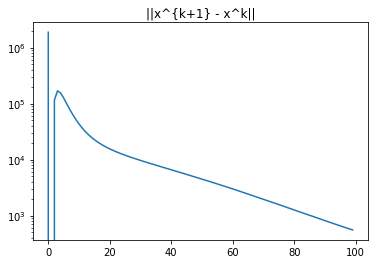

lambda = 1
SNR = 21.12
PSNR = 26.81


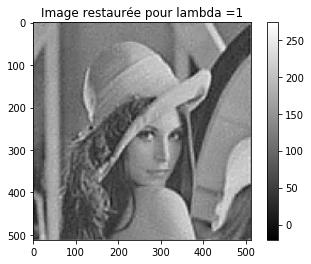

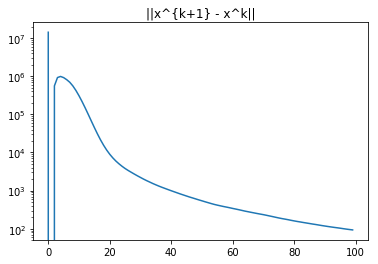

lambda = 10
SNR = 19.9
PSNR = 25.62


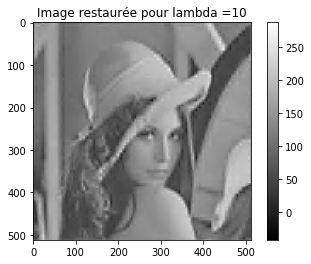

In [32]:
def fista(z,h,l,N):
    resNorm = np.zeros((N,1))
    hfft = np.fft.fft2(h)
    hfftConj = np.conj(hfft)
    #initialisation
    coeffs = pywt.wavedec2(z, 'db2',mode='periodization',level=5)
    x, coeff_slices = pywt.coeffs_to_array(coeffs)
    t=0
    #Boucle
    for i in np.arange(0,N,1):
        # Transformee ondelette inverse
        y = pywt.waverec2(coeffs, 'db2',mode='periodization')
        coeffsprec=coeffs
        # Application Kh et calcul du residu
        y = z - np.real(np.fft.ifft2(hfft*np.fft.fft2(y)))
        # Application de Kh1
        y = np.real(np.fft.ifft2(hfftConj*np.fft.fft2(y)))
        # Mise à jour des coefficients
        coeffs = pywt.wavedec2(y, 'db2',mode='periodization',level=5)
        xtmp, coeff_slices = pywt.coeffs_to_array(coeffs)
        xplus =  pywt.threshold(x + xtmp,l,'soft')
        tn=(1+np.sqrt(t**2+1))/2
        xplus = x + (t-1)/tn * (xplus-x)
        coeffs = pywt.array_to_coeffs(xplus, coeff_slices,output_format='wavedec2')
        # Calcul de la norme residuelle
        resNorm[i] = np.sum((x-xplus)**2)
        x=xplus 
        t=tn
        
    y = pywt.waverec2(coeffs, 'db2',mode='periodization')
    plt.figure(20)
    plt.semilogy(resNorm)
    plt.title('||x^{k+1} - x^k||')    
    plt.show() 
    return y

print('The initial SNR is ' + str(round(snr(y,z3),2)))
print('The initial PSNR is ' + str(round(psnr(y,z3),2)))

plt.figure(2)
plt.plot(121)
plt.subplot(121)
plt.imshow(y, cmap="gray")
plt.colorbar()
plt.title('Image originale')

plt.subplot(122)
plt.imshow(z, cmap="gray")
plt.colorbar()
plt.title('Image dégradée')
plt.show()

N=100
il=[0.01,0.1,1,10]
for l in il:
    yest = fista(z3,h3,l,N)
    print('lambda = ' + repr(l))
    print('SNR = ' + str(round(snr(y,yest),2)))
    print('PSNR = ' + str(round(psnr(y,yest),2)))
    plt.figure()
    plt.imshow(yest, cmap="gray")
    plt.colorbar()
    plt.title('Image restaurée pour lambda ='+ repr(l))
    plt.show()